In [45]:
%matplotlib inline

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [47]:
df = pd.read_csv("dataset/data_playlist.csv")

### Features del dataframe

- **acousticness**: Número [float]  
  Una medida de confianza de 0.0 a 1.0 de si la pista es acústica. Un valor de 1.0 representa alta confianza en que la pista es acústica.  
  **Rango**: 0 - 1

- **danceability**: Número [float]  
  La bailabilidad describe cuán adecuada es una pista para bailar, basada en una combinación de elementos musicales, incluyendo el tempo, la estabilidad del ritmo, la fuerza del compás y la regularidad general. Un valor de 0.0 es lo menos bailable y 1.0 es lo más bailable.

- **duration_ms**: Entero [integer]  
  La duración de la pista en milisegundos.

- **energy**: Número [float]  
  La energía es una medida de 0.0 a 1.0 que representa una medida perceptual de intensidad y actividad. Generalmente, las pistas enérgicas se sienten rápidas, fuertes y ruidosas. Las características perceptuales que contribuyen a este atributo incluyen el rango dinámico, la sonoridad percibida, el timbre, la frecuencia de inicio y la entropía general.

- **instrumentalness**: Número [float]  
  Predice si una pista no contiene voces. Los sonidos como "Ooh" y "aah" se consideran instrumentales en este contexto. Las pistas de rap o palabra hablada son claramente "vocales". Cuanto más cercano esté el valor de instrumentalidad a 1.0, mayor es la probabilidad de que la pista no contenga contenido vocal. Los valores superiores a 0.5 están destinados a representar pistas instrumentales, pero la confianza es mayor a medida que el valor se acerca a 1.0.

- **key**: Entero [integer]  
  La clave en la que se encuentra la pista. Los enteros se asignan a tonos utilizando la notación estándar de clase de tono. 0 = C (Do), 1 = C♯/D♭ (Do sostenido/Re bemol), 2 = D (Re), 3 = D♯/E♭ (Re sostenido/Mi bemol), 4 = E (Mi), 5 = F (Fa), 6 = F♯/G♭ (Fa sostenido/Sol bemol), 7 = G (Sol), 8 = G♯/A♭ (Sol sostenido/La bemol), 9 = A (La), 10 = A♯/B♭ (La sostenido/Si bemol), 11 = B (Si). -1 indica que no se detectó una clave.  
  **Rango**: -1 - 11

- **liveness**: Número [float]  
  Detecta la presencia de una audiencia en la grabación. Los valores altos de vivacidad representan una mayor probabilidad de que la pista haya sido interpretada en vivo. Un valor superior a 0.8 indica una alta probabilidad de que la pista sea en vivo.

- **loudness**: Número [float]  
  La sonoridad total de una pista en decibelios (dB). Los valores de sonoridad se promedian en toda la pista y son útiles para comparar la sonoridad relativa entre pistas. La sonoridad es la cualidad de un sonido que es el principal correlato psicológico de la fuerza física (amplitud). Los valores típicamente oscilan entre -60 y 0 dB.

- **mode**: Entero [integer]  
  Indica la modalidad (mayor o menor) de una pista, el tipo de escala de la que se deriva su contenido melódico. Mayor está representado por 1 y menor por 0.

- **speechiness**: Número [float]  
  La cualidad de habla detecta la presencia de palabras habladas en una pista. Cuanto más exclusivamente parecida al habla sea la grabación (por ejemplo, programa de entrevistas, audiolibro, poesía), más cercano a 1.0 será el valor del atributo. Los valores superiores a 0.66 describen pistas que probablemente están compuestas completamente de palabras habladas. Los valores entre 0.33 y 0.66 describen pistas que pueden contener tanto música como habla, ya sea en secciones o superpuestas, como en el caso del rap. Los valores por debajo de 0.33 representan probablemente música y otras pistas no parecidas al habla.

- **tempo**: Número [float]  
  El tempo general estimado de una pista en pulsos por minuto (BPM). En terminología musical, el tempo es la velocidad o el ritmo de una pieza determinada y se deriva directamente de la duración promedio del pulso.

- **time_signature**: Entero [integer]  
  Una firma de tiempo estimada. La firma de tiempo (metro) es una convención notacional que especifica cuántos tiempos hay en cada compás. La firma de tiempo varía de 3 a 7, indicando firmas de tiempo de "3/4" a "7/4". 3 representa un compás de 3/4 (valses y baladas), 4 es 4/4 (el más común en pop y rock), 5 es 5/4 (jazz y experimental), 6 es 6/4 o 6/8 (baladas y piezas clásicas) y 7 es 7/4 (progresivo y complejo).   
  **Rango**: 3 - 7 (El nuestro va de 1 a 5)

- **valence**: Número [float]  
  Una medida de 0.0 a 1.0 que describe la positividad musical transmitida por una pista. Las pistas con alta valencia suenan más positivas (por ejemplo, felices, alegres, eufóricas), mientras que las pistas con baja valencia suenan más negativas (por ejemplo, tristes, deprimidas, enojadas).

- **label**: Entero [integer]  
  Indica si una canción es del gusto de la persona que escucha esta playlist. Un valor de **1** significa que la canción le gusta a la persona, mientras que un valor de **0** indica que no le gusta.


In [48]:
df.head(5)

acousticness  danceability  duration  energy  instrumentalness  key  \
0         0.713         0.514    100125   0.521          0.816000    8   
1         0.192         0.714    207019   0.614          0.000000    4   
2         0.333         0.630    216200   0.455          0.000004    5   
3         0.601         0.810    136413   0.221          0.210000    5   
4         0.883         0.465    181440   0.459          0.000173    6   

   liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
0    0.1120   -14.835     0       0.0444  119.879               4    0.143   
1    0.2630    -6.935     1       0.0319  123.969               4    0.582   
2    0.1270    -9.290     1       0.0292  139.931               4    0.199   
3    0.1840   -11.005     1       0.0429  109.960               4    0.798   
4    0.0692    -8.137     0       0.0351   90.807               4    0.288   

   label  
0      1  
1      1  
2      1  
3      1  
4      1

In [49]:
# Muestra los valores mínimos y máximos de cada columna en el DataFrame

min_max_values = df.agg(['min', 'max'])
print(tabulate(min_max_values, headers='keys', tablefmt='fancy_grid'))


╒═════╤════════════════╤════════════════╤════════════╤══════════╤════════════════════╤═══════╤════════════╤════════════╤════════╤═══════════════╤═════════╤══════════════════╤═══════════╤═════════╕
│     │   acousticness │   danceability │   duration │   energy │   instrumentalness │   key │   liveness │   loudness │   mode │   speechiness │   tempo │   time_signature │   valence │   label │
╞═════╪════════════════╪════════════════╪════════════╪══════════╪════════════════════╪═══════╪════════════╪════════════╪════════╪═══════════════╪═════════╪══════════════════╪═══════════╪═════════╡
│ min │       1.17e-06 │          0.107 │      33840 │  0.00925 │              0     │     0 │      0.024 │    -29.601 │      0 │        0.0234 │  55.747 │                1 │    0.0332 │       0 │
├─────┼────────────────┼────────────────┼────────────┼──────────┼────────────────────┼───────┼────────────┼────────────┼────────┼───────────────┼─────────┼──────────────────┼───────────┼─────────┤
│ max │       0

In [50]:
type(min_max_values)

pandas.core.frame.DataFrame

In [51]:
# descripción de cada columna e información general del dataframe

df.info()

#El dataframe esta completo sin valores vacios, ni valores NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      750 non-null    float64
 1   danceability      750 non-null    float64
 2   duration          750 non-null    int64  
 3   energy            750 non-null    float64
 4   instrumentalness  750 non-null    float64
 5   key               750 non-null    int64  
 6   liveness          750 non-null    float64
 7   loudness          750 non-null    float64
 8   mode              750 non-null    int64  
 9   speechiness       750 non-null    float64
 10  tempo             750 non-null    float64
 11  time_signature    750 non-null    int64  
 12  valence           750 non-null    float64
 13  label             750 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 82.2 KB


In [52]:
df.isnull().sum()

acousticness        0
danceability        0
duration            0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
label               0
dtype: int64

In [53]:
tienen_guion = df.astype('str').eq('-').any(axis=0)
tienen_guion

acousticness        False
danceability        False
duration            False
energy              False
instrumentalness    False
key                 False
liveness            False
loudness            False
mode                False
speechiness         False
tempo               False
time_signature      False
valence             False
label               False
dtype: bool

In [54]:
#descripcion estadistica general

df.describe()

acousticness  danceability       duration      energy  \
count    750.000000    750.000000     750.000000  750.000000   
mean       0.357394      0.596439  220112.733333    0.594188   
std        0.338405      0.172036   65587.690483    0.253301   
min        0.000001      0.107000   33840.000000    0.009250   
25%        0.037150      0.480000  185490.250000    0.423250   
50%        0.244500      0.606000  215108.500000    0.631500   
75%        0.678500      0.715750  244236.750000    0.804750   
max        0.994000      0.986000  675360.000000    0.995000   

       instrumentalness         key    liveness    loudness        mode  \
count        750.000000  750.000000  750.000000  750.000000  750.000000   
mean           0.100245    4.829333    0.203376   -8.509339    0.741333   
std            0.259921    3.636001    0.177609    5.039488    0.438194   
min            0.000000    0.000000    0.024000  -29.601000    0.000000   
25%            0.000000    1.000000    0.094550  -10.173500    0.000000   
50%            0.000010    5.000000    0.129000   -7.270000    1.000000   
75%            0.002245    8.000000    0.264750   -5.097750    1.000000   
max            0.967000   11.000000    0.979000   -0.533000    1.000000   

       speechiness       tempo  time_signature     valence       label  
count   750.000000  750.000000      750.000000  750.000000  750.000000  
mean      0.098966  120.405761        3.902667    0.497321    0.602667  
std       0.104715   28.378116        0.400091    0.239615    0.489673  
min       0.023400   55.747000        1.000000    0.033200    0.000000  
25%       0.035900   98.998000        4.000000    0.297000    0.000000  
50%       0.048750  120.104500        4.000000    0.483000    1.000000  
75%       0.113000  138.074750        4.000000    0.684500    1.000000  
max       0.721000  204.162000        5.000000    0.975000    1.000000

In [55]:
# Creacion de un indice para identificar las observaciones

df.index = range(1, len(df) + 1)
df.index.name = 'song'

In [79]:
# Usando pandas profiling
report = ProfileReport(df, title='Spotify Songs', minimal=True)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Graficos

### Graficos de relaciones

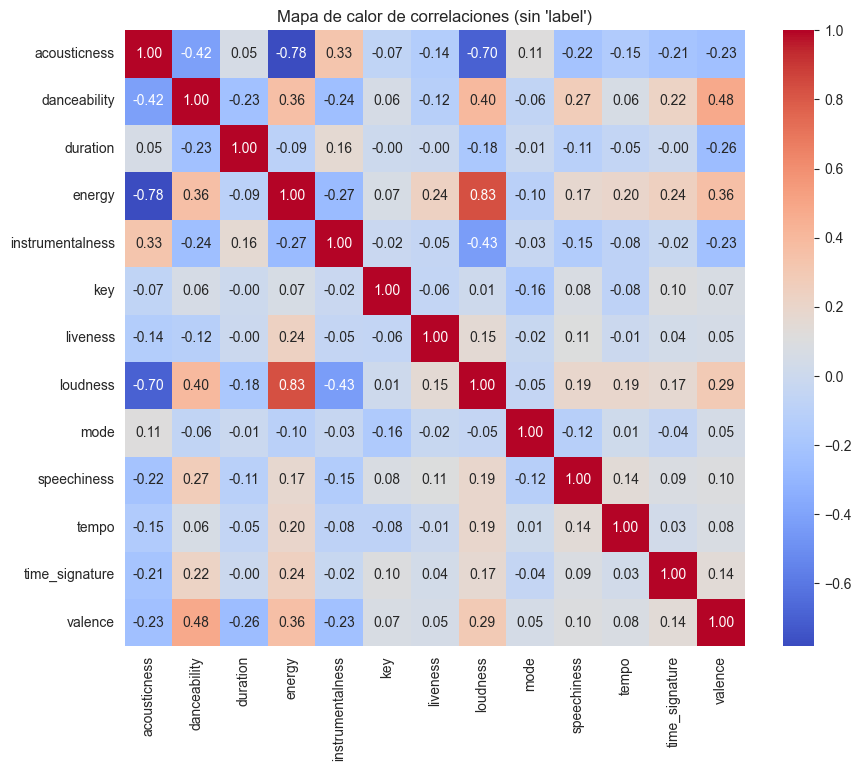

In [57]:
plt.figure(figsize=(10, 8), dpi=100)
sns.heatmap(df.drop(columns=['label']).corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Mapa de calor de correlaciones (sin 'label')")
plt.show()


#### Conclusiones al ver el grafico de correlaciones

#### Correlaciones Negativas Fuertes
- **acousticness y energy (-0.78)**: Las canciones con alta *acousticness* tienden a tener menos *energy*, lo cual es típico en música acústica, que suele ser más suave e intensa.
- **energy y acousticness (-0.78)**: La música enérgica es menos acústica, frecuentemente más orientada hacia producciones electrónicas o de alta intensidad.

#### Correlaciones Positivas Fuertes
- **energy y loudness (0.83)**: La energía de una canción está fuertemente relacionada con su volumen, dado que ambos atributos contribuyen a la percepción de intensidad.
- **loudness y energy (0.83)**: Similarmente, canciones con alto volumen suelen ser enérgicas.

#### Correlaciones Negativas Moderadas
- **acousticness y loudness (-0.70)**: Las canciones acústicas tienden a ser menos fuertes en volumen, acorde a la naturaleza de este estilo.
- **acousticness y danceability (-0.42)**: Las canciones acústicas tienden a ser menos bailables, ya que suelen carecer de ritmos repetitivos y marcados.
- **danceability y acousticness (-0.42)**: La música bailable es menos acústica, frecuentemente con una mayor presencia de elementos electrónicos.
  
#### Correlaciones Positivas Moderadas
- **danceability y valence (0.48)**: Las canciones bailables suelen tener un tono positivo, típico en géneros como pop y dance.
- **valence y danceability (0.48)**: La positividad en una canción está asociada con su bailabilidad.
- **danceability con loudness (0.40) y energy (0.36)**: Canciones con ritmo bailable tienden a ser más fuertes y enérgicas.
- **energy y valence (0.36)**: Las canciones enérgicas suenan más positivas, un patrón común en géneros de alta energía.

#### Correlaciones Bajas
- **instrumentalness y acousticness (0.33)**: Las canciones instrumentales suelen ser ligeramente más acústicas.
- **loudness y valence (0.29)**: Canciones fuertes tienden a sonar más positivas.
- **speechiness y danceability (0.27)**: La presencia de palabras habladas está débilmente asociada con la bailabilidad.

#### Correlaciones Muy Bajas o Sin Correlación
- **duration, key, liveness, mode, speechiness, tempo y time_signature**: Estas características muestran correlaciones muy bajas con otras variables, indicando que son más independientes y no afectan significativamente atributos como la energía, la bailabilidad o el volumen de la música.


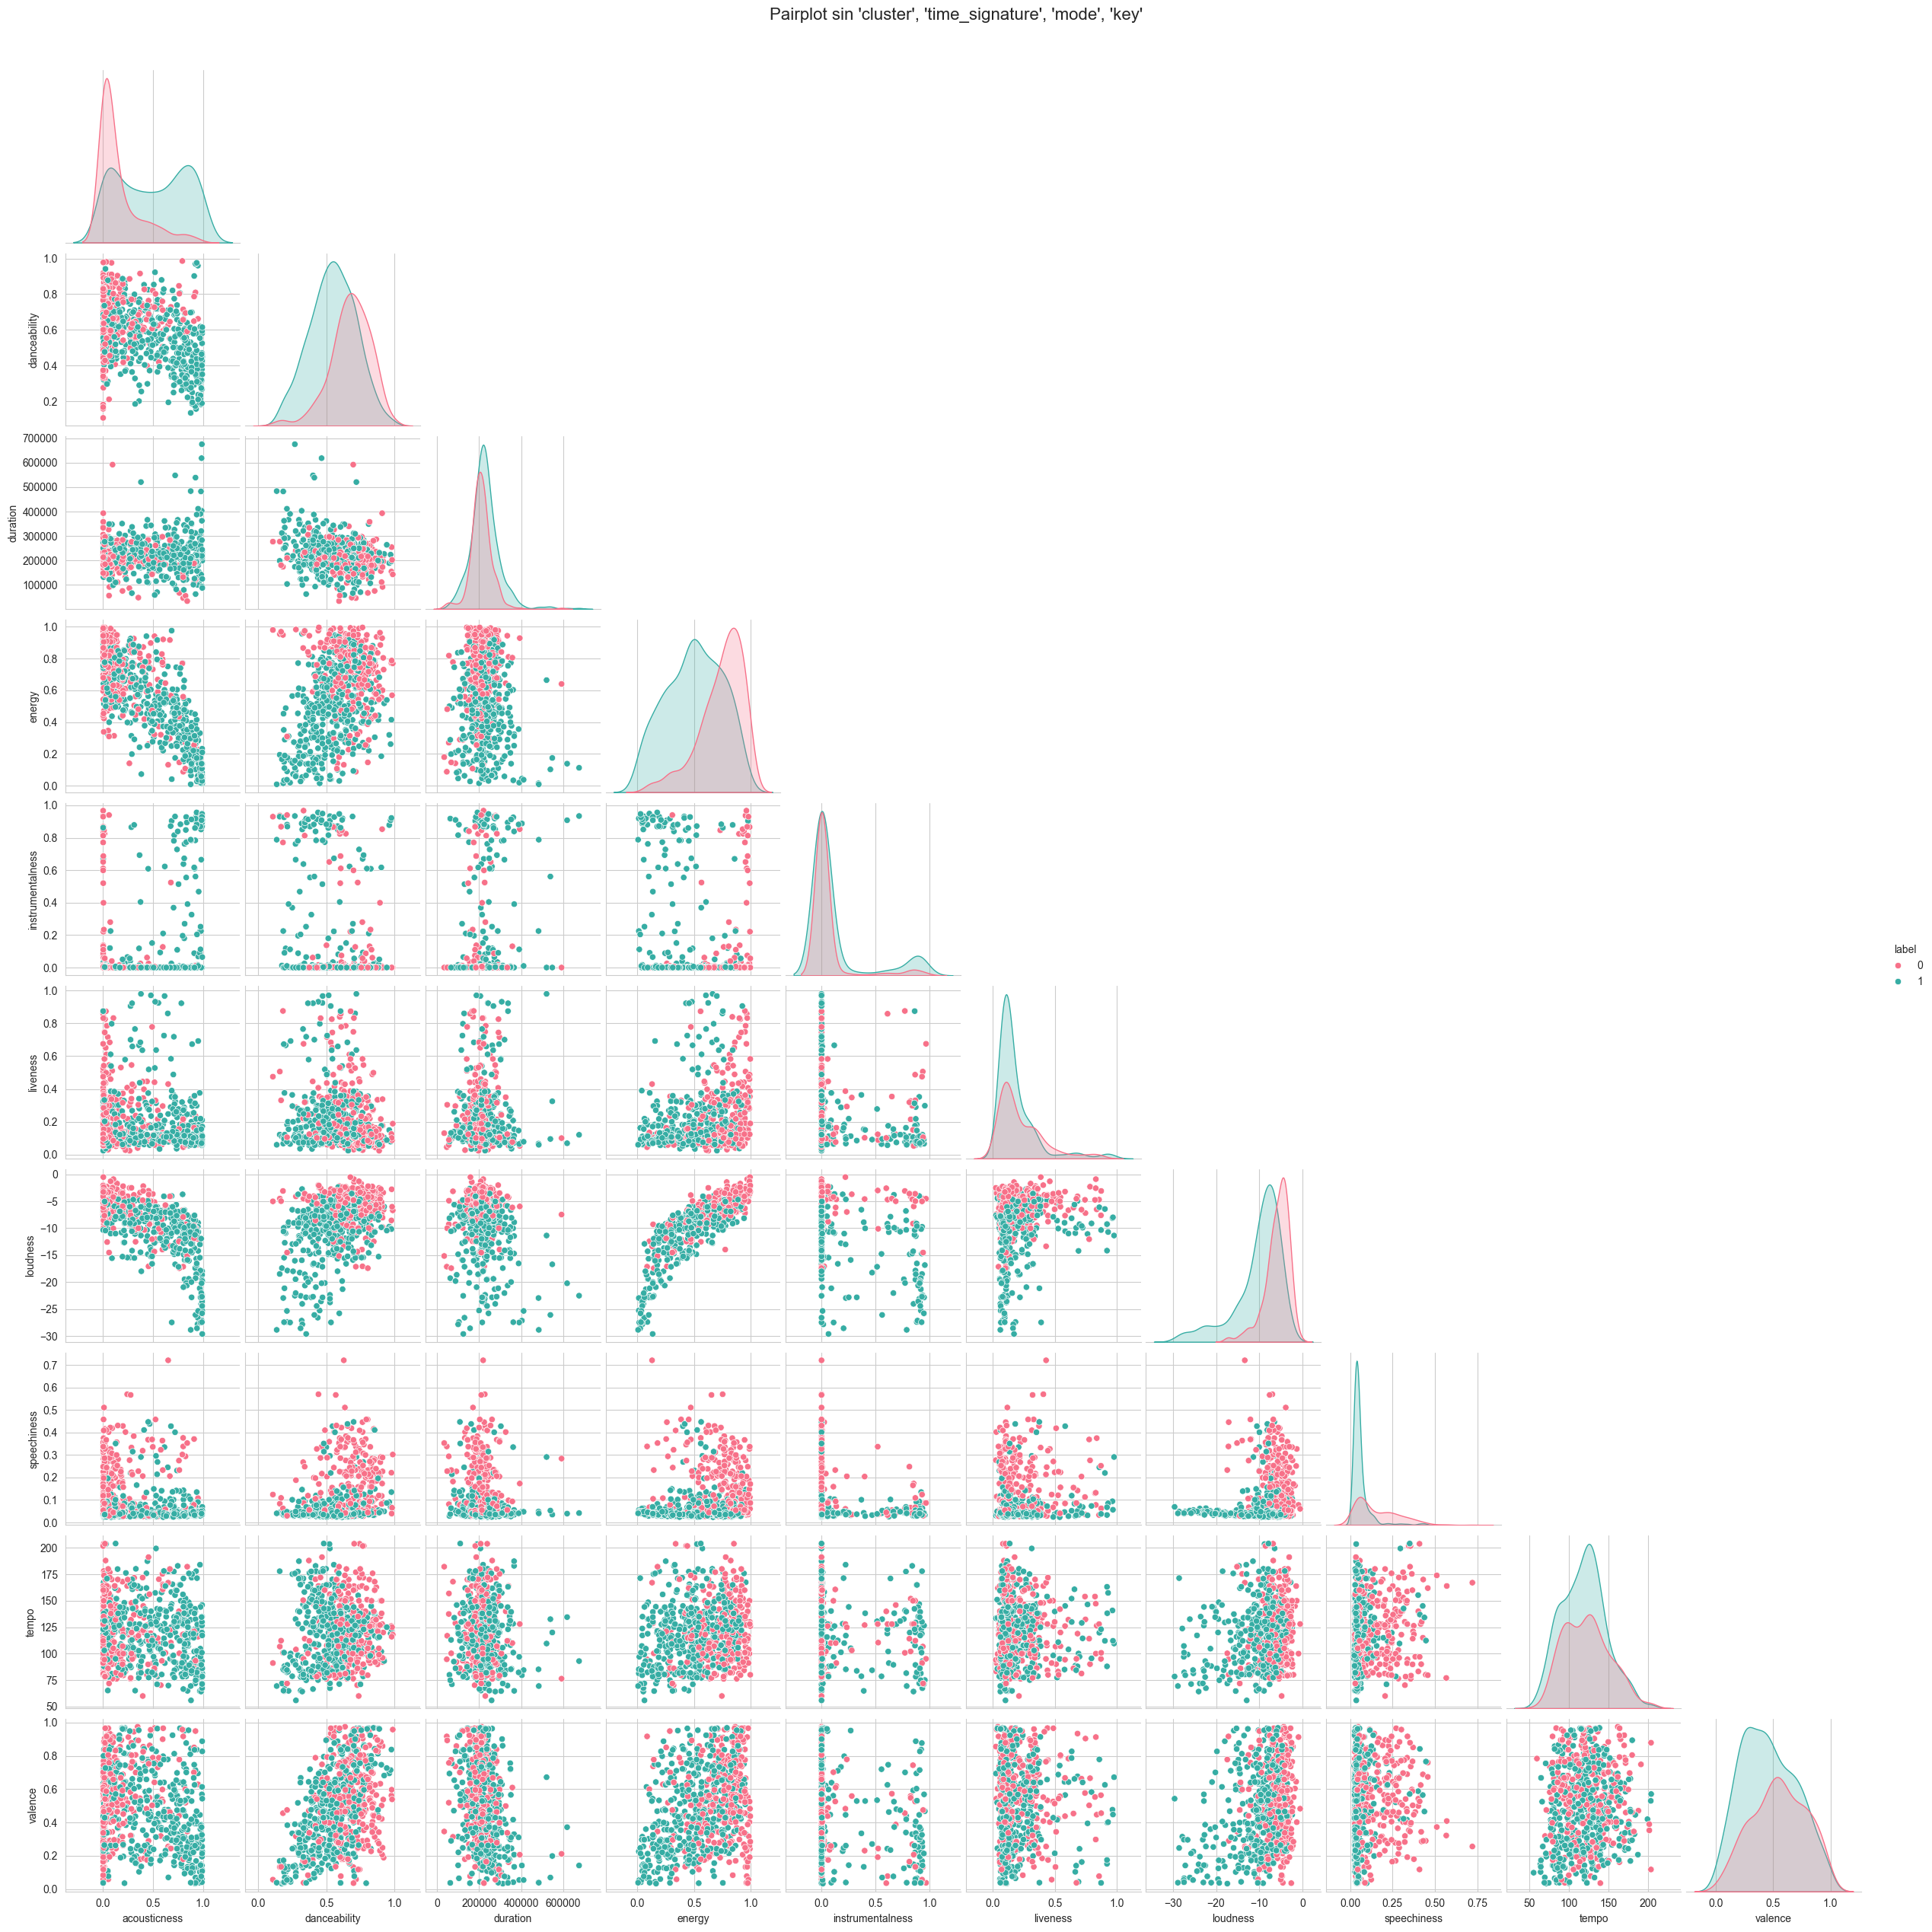

In [69]:
#Graficos con variables continuas, timepo considerado como continuo


# Crear un nuevo DataFrame excluyendo las columnas: 'cluster', 'time_signature', 'mode', 'key'
variables_a_excluir = ['cluster', 'time_signature', 'mode', 'key']
df_sin_columnas = df.drop(columns=variables_a_excluir, errors='ignore')

# Crear pairplot sin las variables excluidas
sns.pairplot(df_sin_columnas, hue='label', diag_kind="kde", palette="husl", corner=True)

# Ajustar el título general del gráfico
plt.suptitle("Pairplot sin 'cluster', 'time_signature', 'mode', 'key'", y=1.02, fontsize=16)

# Mostrar el gráfico
plt.show()

#### Distribuciones en las Diagonales (Histogramas/Densidad)
Conclusiones de diagonales del pairplot, distribuciones univariadas (KDE o histogramas) para cada característica:

**acousticness**:
- Las canciones con `label=1` (gustan al usuario, en verde) tienden a tener valores más altos en *acousticness* en comparación con las canciones con `label=0` (no gustan, en rojo).
- Esto indica que al usuario le gustan más las canciones acústicas.

**danceability**:
- Las distribuciones son más homogéneas, pero las canciones con `label=1` están ligeramente sesgadas hacia valores más altos, sugiriendo que las canciones bailables son preferidas.

**duration**:
- La duración no parece ser un factor determinante, ya que las distribuciones son similares para ambos valores de `label`.

**energy**:
- Las canciones con `label=0` tienen mayor frecuencia en valores altos de *energy*, mientras que las canciones con `label=1` se concentran más en valores medios-bajos.
- Esto sugiere que al usuario le gustan canciones menos enérgicas.

**instrumentalness**:
- Las canciones con valores más altos en *instrumentalness* tienen mayor probabilidad de estar asociadas con `label=1`, lo que indica que las canciones instrumentales son más del agrado del usuario.

**valence**:
- La positividad (*valence*) de las canciones no muestra diferencias claras entre `label=0` y `label=1`, aunque las canciones con `label=1` tienen una ligera preferencia por valores medios.

#### Relaciones Bivariadas (graficos de dispersion)
Los gráficos fuera de la diagonal muestran cómo se relacionan las características entre sí y cómo se agrupan según `label`:

**acousticness vs energy**:
- Hay una correlación negativa clara: canciones con alta *acousticness* tienden a tener baja *energy*.
- Las canciones con `label=1` están más concentradas en el extremo alto de *acousticness* y bajo de *energy*, reforzando la preferencia por canciones tranquilas y acústicas.

**danceability vs valence**:
- Canciones con mayor *danceability* tienden a tener mayor *valence* (positividad).
- Canciones con `label=1` parecen preferir una combinación de *danceability* moderada y *valence* medio.

**instrumentalness vs duration**:
- Las canciones con valores altos en *instrumentalness* tienden a tener duraciones más largas, y muchas de ellas tienen `label=1`, indicando una preferencia por canciones instrumentales y extendidas.

**loudness vs energy**:
- Existe una correlación positiva fuerte entre *loudness* y *energy*, lo cual es esperado.
- Las canciones con `label=1` se agrupan más en valores bajos de *loudness* y *energy*, indicando que el usuario prefiere canciones menos ruidosas e intensas.

**tempo vs danceability**:
- No hay una relación fuerte aparente entre *tempo* y *danceability*.
- Sin embargo, las canciones con `label=1` parecen preferir valores intermedios de *tempo*.

#### Relacion con label (gusto del usuario)
Con base en el análisis:

- **Al usuario le gustan más las canciones acústicas y tranquilas:**
  - *High acousticness* y *low energy* son características predominantes en las canciones con `label=1`.

- **Preferencia por canciones instrumentales:**
  - Canciones con altos valores de *instrumentalness* tienen una mayor probabilidad de gustarle al usuario.

- **Gusto moderado por la bailabilidad:**
  - Canciones con *danceability* en rangos medios a altos son preferidas.

- **Menor interés en canciones intensas:**
  - Canciones con alta *energy* y *loudness* suelen estar asociadas con `label=0`, indicando que no son del agrado del usuario.

#### 4. Observaciones Adicionales
- No parece haber una relación directa entre la duración de las canciones y el gusto del usuario.
- La variable *valence* (positividad) no es un diferenciador claro entre canciones que le gustan o no al usuario.


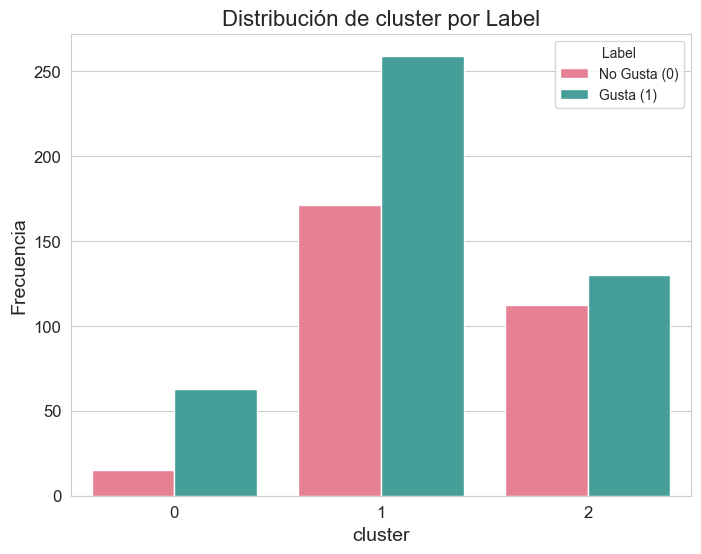

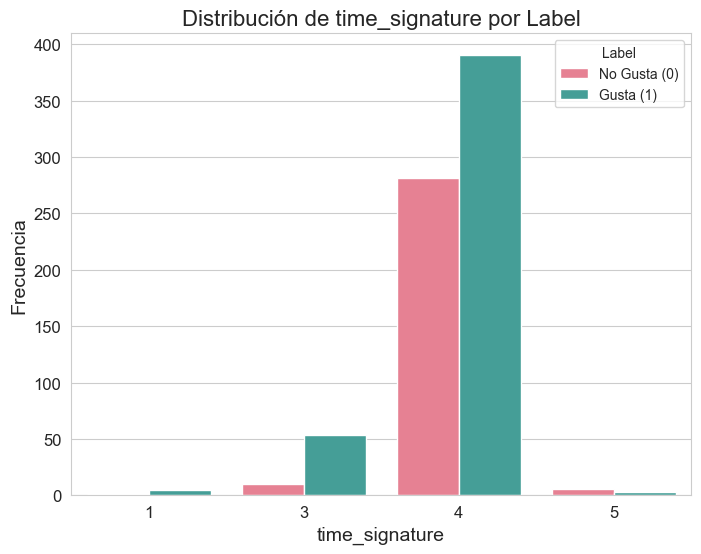

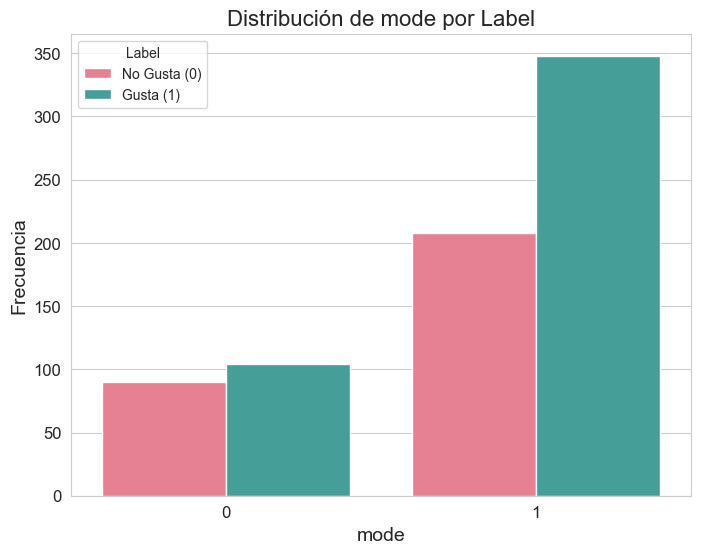

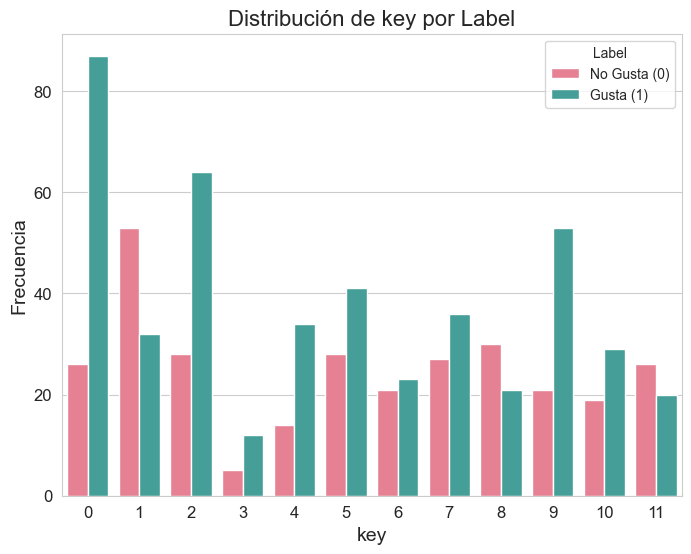

In [78]:

# Variables discretas conocidas
variables_discretas = ['cluster', 'time_signature', 'mode', 'key']

# Graficar distribuciones para cada variable discreta
for var in variables_discretas:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=var, hue='label', palette="husl")
    plt.title(f"Distribución de {var} por Label", fontsize=16)
    plt.xlabel(var, fontsize=14)
    plt.ylabel("Frecuencia", fontsize=14)
    plt.legend(title='Label', labels=['No Gusta (0)', 'Gusta (1)'])
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


#### Gráficos de Variables Discretas, Conclusiones:

**1. Cluster**
- La categoría del `cluster` tiene tres valores: 0, 1, y 2.
- Las canciones con `cluster=1` son las que más gustan (`label=1`), mientras que las de `cluster=0` son las que menos gustan (`label=0`).
- Esto sugiere que el `cluster` puede ser un buen diferenciador de preferencias musicales.

**2. Time Signature**
- La mayoría de las canciones tienen un `time_signature=4`, y estas son las que más gustan (`label=1`).
- Los `time_signature=3` y `time_signature=5` también tienen una pequeña representación, pero son menos preferidos.
- Esto refuerza que la mayoría de las canciones populares siguen un compás estándar.

**3. Mode**
- Las canciones en `mode=1` (es decir, en modo mayor) gustan significativamente más al usuario (`label=1`), en comparación con las canciones en `mode=0` (modo menor).
- Esto coincide con la tendencia de que el modo mayor suele transmitir emociones más positivas.

**4. Key**
- La tonalidad (`key`) muestra una amplia distribución.
- Las canciones con tonalidades como `key=0` (C), `key=2` (D), y `key=9` (A) son las más preferidas (`label=1`).
- Otras tonalidades, como `key=3` y `key=10`, tienen menos canciones favoritas.

#### Observaciones Generales
- El `cluster` y el `mode` parecen ser los atributos más influyentes para determinar las canciones que gustan al usuario.
- El `time_signature` estándar (4/4) es una constante en las canciones preferidas, lo que podría indicar que el ritmo juega un papel importante en las preferencias.
- Aunque la tonalidad (`key`) tiene una distribución amplia, algunas tonalidades específicas parecen destacar entre las canciones que gustan.

En general, estos gráficos ofrecen una visión clara de cómo las variables discretas se relacionan con las preferencias del usuario (`label`), lo que puede ser útil para construir modelos predictivos o sistemas de recomendación.


## Analisis de las variables

In [64]:
#clasificar en 2 los gustos 

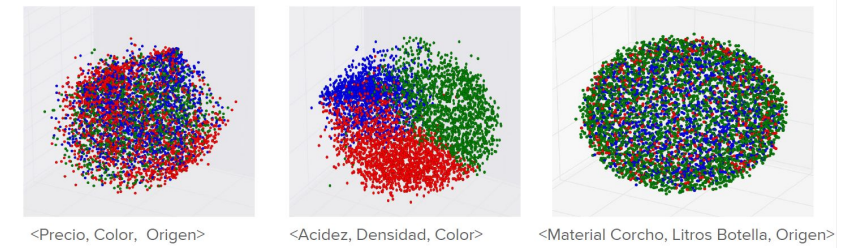

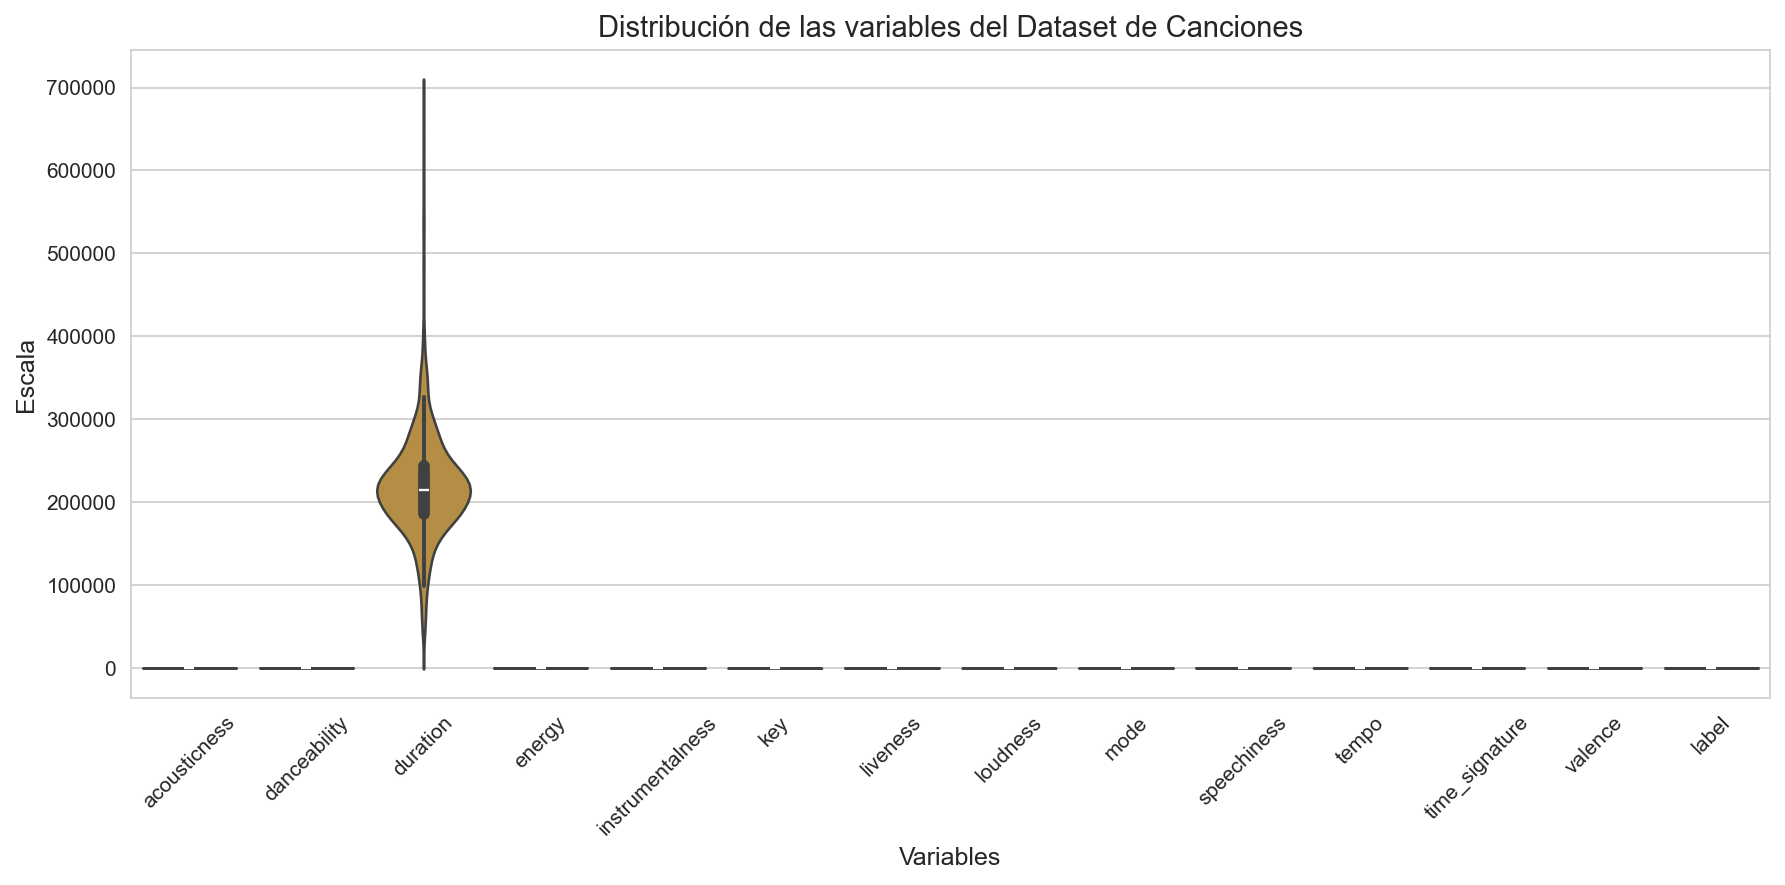

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de violín para las variables del dataset de canciones
plt.figure(figsize=(12, 6), dpi=150)
sns.violinplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.ylabel("Escala", fontsize=12)
plt.xlabel("Variables", fontsize=12)
plt.title("Distribución de las variables del Dataset de Canciones", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


La duration esta fuera de escala comparada con el resto de variables. Es un problema que hay que solucionar

## Escalado

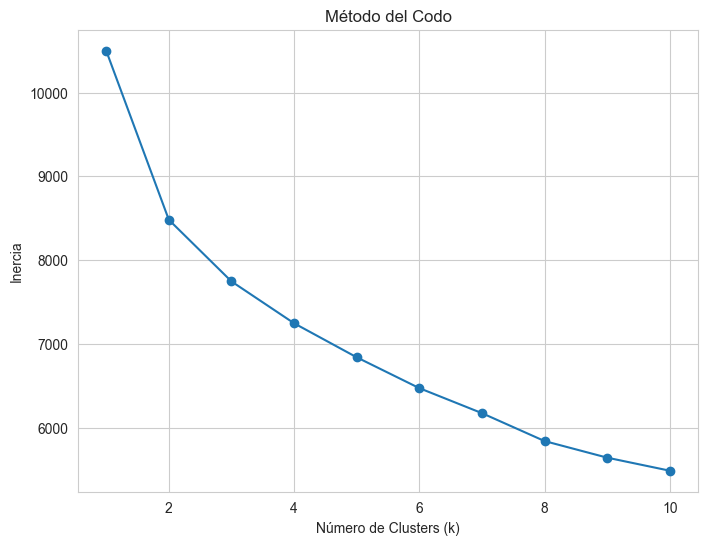

In [86]:
inercias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_standard_scaled)
    inercias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inercias, marker='o')
plt.title("Método del Codo")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inercia")
plt.show()

### k - means

K means es muy utilizado para problemas de recomendaciones. Se prueba con 6 clusters respaldado con el metodo elbow en 2 dimensiones y luego lo mismo pero en 3 dimesiones

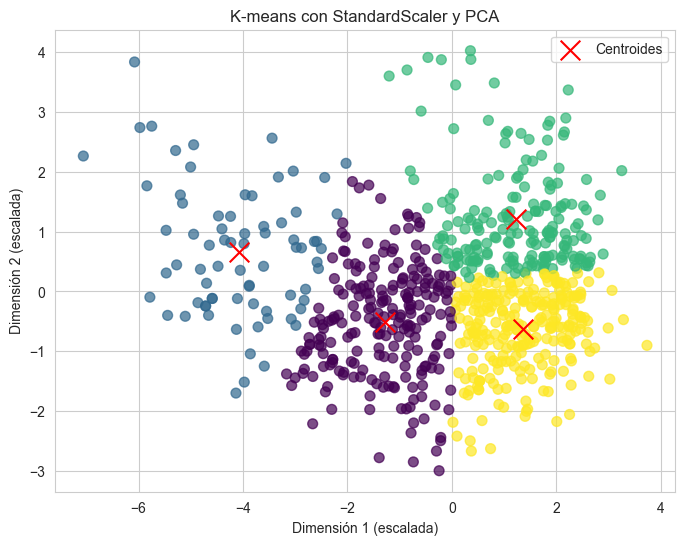

In [134]:
# Estándarizar las variables del dataset
scaler_standard = StandardScaler()
X_standard_scaled = scaler_standard.fit_transform(df.select_dtypes(include=['float64', 'int64']))

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
songs_PCA_standard = pca.fit_transform(X_standard_scaled)

# Aplicar K-Means con variables escaladas
n_clusters = 4  # Cambiar si es necesario
kmeans_standard = KMeans(n_clusters=n_clusters, random_state=42, n_init=30)
clusters_standard = kmeans_standard.fit_predict(songs_PCA_standard)

# Visualización de los clusters en las dos dimensiones principales
plt.figure(figsize=(8, 6))
plt.scatter(songs_PCA_standard[:, 0], songs_PCA_standard[:, 1], c=clusters_standard, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans_standard.cluster_centers_[:, 0], kmeans_standard.cluster_centers_[:, 1], 
            c='red', marker='x', s=200, label='Centroides')
plt.title('K-means con StandardScaler y PCA')
plt.xlabel('Dimensión 1 (escalada)')
plt.ylabel('Dimensión 2 (escalada)')
plt.legend()
plt.show()


### Min Max Escaler

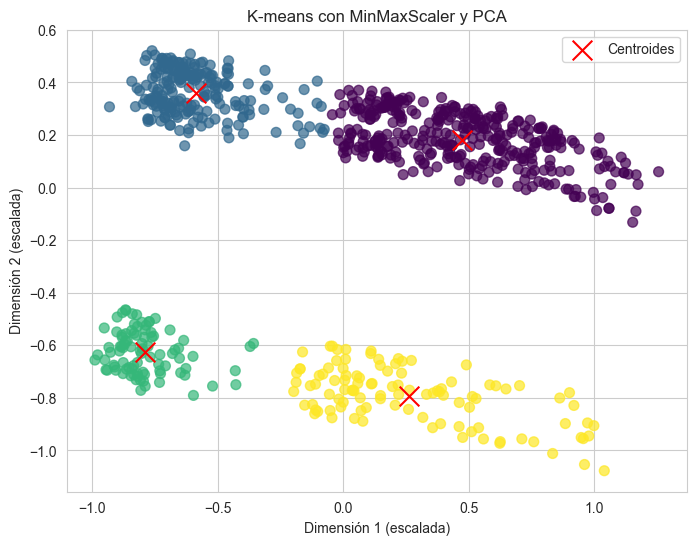

In [136]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Escalar los datos usando MinMaxScaler
scaler_minmax = MinMaxScaler()
X_minmax_scaled = scaler_minmax.fit_transform(df.select_dtypes(include=['float64', 'int64']))

# Reducción de dimensionalidad con PCA a 2 dimensiones
pca = PCA(n_components=2)
songs_PCA_minmax = pca.fit_transform(X_minmax_scaled)

# Aplicar K-Means con variables escaladas (MinMaxScaler)
n_clusters = 4  # Cambiar si es necesario
kmeans_minmax = KMeans(n_clusters=n_clusters, random_state=42, n_init=30)
clusters_minmax = kmeans_minmax.fit_predict(songs_PCA_minmax)

# Visualización de los clusters con MinMaxScaler
plt.figure(figsize=(8, 6))
plt.scatter(songs_PCA_minmax[:, 0], songs_PCA_minmax[:, 1], c=clusters_minmax, cmap='viridis', alpha=0.7, s=50)
plt.scatter(kmeans_minmax.cluster_centers_[:, 0], kmeans_minmax.cluster_centers_[:, 1], 
            c='red', marker='x', s=200, label='Centroides')
plt.title('K-means con MinMaxScaler y PCA')
plt.xlabel('Dimensión 1 (escalada)')
plt.ylabel('Dimensión 2 (escalada)')
plt.legend()
plt.show()


In [137]:
# Con StandardScaler
silhouette_standard = silhouette_score(songs_PCA_standard, clusters_standard)

# Con MinMaxScaler
silhouette_minmax = silhouette_score(songs_PCA_minmax, clusters_minmax)

# Resultados
print(f'Silhouette score con StandardScaler: {silhouette_standard}')
print(f'Silhouette score con MinMaxScaler: {silhouette_minmax}')

Silhouette score con StandardScaler: 0.3494189157523192
Silhouette score con MinMaxScaler: 0.6516599943515335


Limpieza del Dataset:

Transformación de Variables y Selección de Features:

Reducción de la Dimensionalidad: